<a href="https://colab.research.google.com/github/gs3257/nyu-python-public-policy/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from google.colab import drive

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
noise = df[df.complaint_type == 'Noise - Residential']
heatwater = df[df.complaint_type == 'HEAT/HOT WATER']
other = df[(df.complaint_type != 'HEAT/HOT WATER') & (df.complaint_type != 'Noise - Residential')]

In [9]:
count_noise = noise.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_noise))

count_heatwater = heatwater.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_heatwater))

count_other = other.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_other))

count_all = df.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_all))

69
66
77
77


In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [0]:
def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

count_noise['borocd'] = count_noise.apply(recode_borocd_counts, axis=1)

count_heatwater['borocd'] = count_heatwater.apply(recode_borocd_counts, axis=1)

count_other['borocd'] = count_other.apply(recode_borocd_counts, axis=1)

count_all['borocd'] = count_all.apply(recode_borocd_counts, axis=1)

In [12]:
count_noise = count_noise[count_noise.borocd.isin(valid_borocds)]
print(len(count_noise))

count_heatwater = count_heatwater[count_heatwater.borocd.isin(valid_borocds)]
print(len(count_heatwater))

count_other = count_other[count_other.borocd.isin(valid_borocds)]
print(len(count_other))

count_all = count_all[count_all.borocd.isin(valid_borocds)]
print(len(count_all))

59
59
59
59


In [13]:
print(count_noise.head())
print(count_heatwater.head())
print(count_other.head())
print(count_all.head())

    community_board  count_of_311_requests borocd
1          01 BRONX                   3691    201
2       01 BROOKLYN                   5844    301
3      01 MANHATTAN                    722    101
4         01 QUEENS                   4589    401
5  01 STATEN ISLAND                   5052    501
    community_board  count_of_311_requests borocd
0          01 BRONX                   3346    201
1       01 BROOKLYN                   2868    301
2      01 MANHATTAN                    276    101
3         01 QUEENS                   2466    401
4  01 STATEN ISLAND                   1644    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  20316    201
2       01 BROOKLYN                  59389    301
3      01 MANHATTAN                  20261    101
4         01 QUEENS                  53370    401
5  01 STATEN ISLAND                  58449    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  27353    201


In [14]:
27353 == 20316 + 3346 + 3691

True

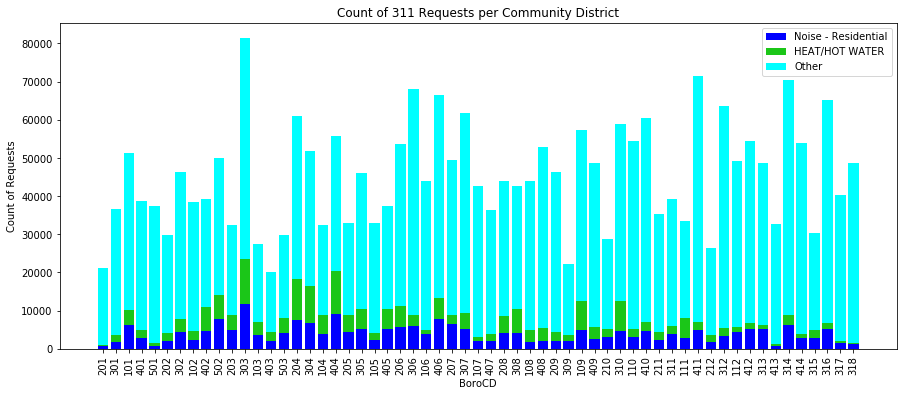

In [15]:
position_on_x = np.arange(len(count_noise))

count_other_array = np.array(count_other.sort_values('borocd').count_of_311_requests)
count_noise_array = np.array(count_noise.sort_values('borocd').count_of_311_requests)
count_heatwater_array = np.array(count_heatwater.sort_values('borocd').count_of_311_requests)

plt.figure(figsize=(15, 6))
plot1 = plt.bar(
  position_on_x,
  count_noise_array,
  align='center',
  color='blue',
  label='Noise - Residential'
)
plot2 = plt.bar(
  position_on_x,
  count_heatwater_array,
  bottom=count_noise_array, 
  align='center',
  color='#1BC618',
  label='HEAT/HOT WATER'
)
plot3 = plt.bar(
  position_on_x,
  count_other_array,
  bottom=count_noise_array + count_heatwater_array, 
  align='center',
  color='cyan',
  label='Other'
)
plt.xticks(position_on_x, count_noise.borocd, rotation=90)
plt.title('Count of 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('Count of Requests')
plt.legend() 

plt.show()

In [16]:
counts = pd.merge(left=count_all, right=count_noise, left_on='borocd', right_on='borocd')

counts = pd.merge(left=counts, right=count_heatwater, left_on='borocd', right_on='borocd')

counts = pd.merge(left=counts, right=count_other, left_on='borocd', right_on='borocd')

counts.head()

,community_board_x,count_of_311_requests_x,borocd,community_board_y,count_of_311_requests_y,community_board_x,count_of_311_requests_x,community_board_y,count_of_311_requests_y
0,01 BRONX,27353,201,01 BRONX,3691,01 BRONX,3346,01 BRONX,20316
1,01 BROOKLYN,68101,301,01 BROOKLYN,5844,01 BROOKLYN,2868,01 BROOKLYN,59389
2,01 MANHATTAN,21259,101,01 MANHATTAN,722,01 MANHATTAN,276,01 MANHATTAN,20261
3,01 QUEENS,60425,401,01 QUEENS,4589,01 QUEENS,2466,01 QUEENS,53370
4,01 STATEN ISLAND,65145,501,01 STATEN ISLAND,5052,01 STATEN ISLAND,1644,01 STATEN ISLAND,58449


In [0]:
counts.columns = ['community_board_x', 'count_all', 'borocd',
       'community_board_y', 'count_noise', 'community_board_x',
       'count_heatwater', 'community_board_y',
       'count_other']

In [18]:
counts.head()

,community_board_x,count_all,borocd,community_board_y,count_noise,community_board_x,count_heatwater,community_board_y,count_other
0,01 BRONX,27353,201,01 BRONX,3691,01 BRONX,3346,01 BRONX,20316
1,01 BROOKLYN,68101,301,01 BROOKLYN,5844,01 BROOKLYN,2868,01 BROOKLYN,59389
2,01 MANHATTAN,21259,101,01 MANHATTAN,722,01 MANHATTAN,276,01 MANHATTAN,20261
3,01 QUEENS,60425,401,01 QUEENS,4589,01 QUEENS,2466,01 QUEENS,53370
4,01 STATEN ISLAND,65145,501,01 STATEN ISLAND,5052,01 STATEN ISLAND,1644,01 STATEN ISLAND,58449


In [0]:
counts = counts[['borocd', 'count_all', 'count_noise', 'count_heatwater', 'count_other']]

In [20]:
counts.head()

,borocd,count_all,count_noise,count_heatwater,count_other
0,201,27353,3691,3346,20316
1,301,68101,5844,2868,59389
2,101,21259,722,276,20261
3,401,60425,4589,2466,53370
4,501,65145,5052,1644,58449


In [0]:
population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')

def recode_borocd_pop(row):
  if row.Borough == 'Manhattan':
    return str(100 + row['CD Number'])
  elif row.Borough == 'Bronx':
    return str(200 + row['CD Number'])
  elif row.Borough == 'Brooklyn':
    return str(300 + row['CD Number'])
  elif row.Borough == 'Queens':
    return str(400 + row['CD Number'])
  elif row.Borough == 'Staten Island':
    return str(500 + row['CD Number'])
  else:
    return 'Invalid borocd'

population['borocd'] = population.apply(recode_borocd_pop, axis=1)

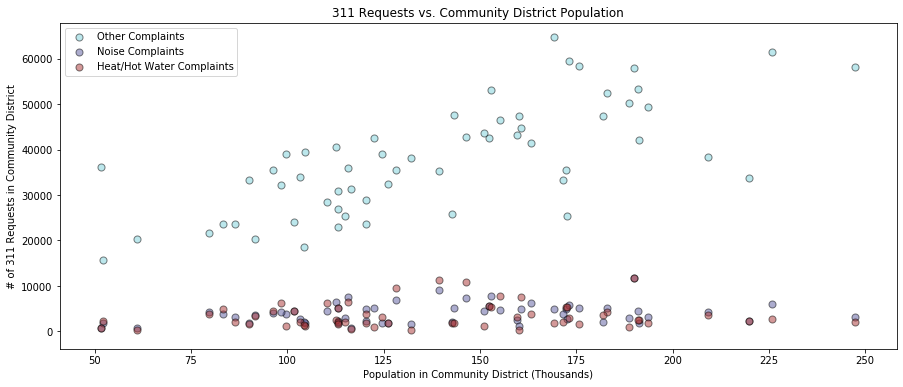

In [28]:
x = population.sort_values('borocd')['2010 Population']/1000

plt.figure(figsize=(15, 6))

plt.scatter(
  x, 
  counts.sort_values('borocd').count_other, 
  s=50, 
  c='#7bd0db', 
  edgecolors='black', 
  alpha=0.5, 
  label='Other Complaints') 

plt.scatter(
  x, 
  counts.sort_values('borocd').count_noise, 
  s=50, 
  c='#5a5b9f', 
  edgecolors='black', 
  alpha=0.5, 
  label='Noise Complaints') 

plt.scatter(
  x, 
  counts.sort_values('borocd').count_heatwater, 
  s=50, 
  c='#a83232', 
  edgecolors='black', 
  alpha=0.5, 
  label='Heat/Hot Water Complaints') 

plt.title('311 Requests vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')
plt.legend()
plt.show()

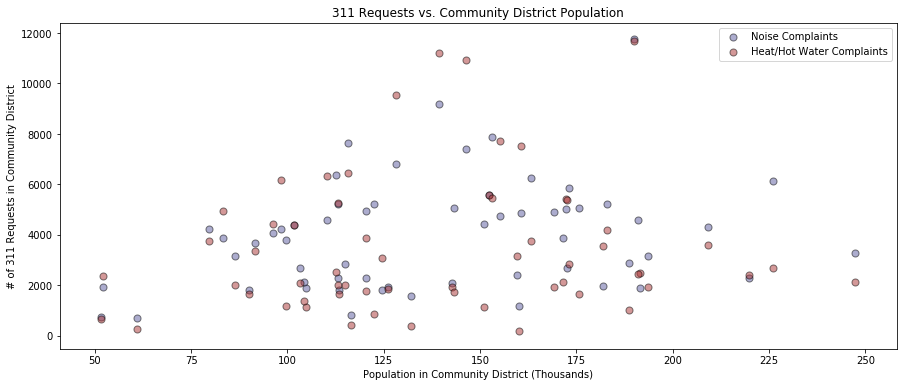

In [29]:
plt.figure(figsize=(15, 6))
plt.scatter(
  x, 
  counts.sort_values('borocd').count_noise, 
  s=50, 
  c='#5a5b9f', 
  edgecolors='black', 
  alpha=0.5, 
  label='Noise Complaints') 

plt.scatter(
  x, 
  counts.sort_values('borocd').count_heatwater, 
  s=50, 
  c='#a83232', 
  edgecolors='black', 
  alpha=0.5, 
  label='Heat/Hot Water Complaints') 

plt.title('311 Requests vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')
plt.legend()
plt.show()

The relationship between population and noise complaints and the relationship between population and heat/water complaints seems to be fairly weak. The lack of relationship could be explained by factors such as old housing, aging heating systems, and the lack of regulations restricting noisy activities for building residents and businesses.